# 4: Selección de características (feature selection)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

from pandas.plotting import scatter_matrix

from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Lectura de los datos normalizados

### Entrenamiento

In [2]:
sensors = ["sensorMeasure" + str(i) for i in range(1, 22)]

# Leyendo la data de entrenamiento.
df_train1 = pd.read_csv('df_train1_norm.csv')
df_train3 = pd.read_csv('df_train3_norm.csv')
df_train2 = pd.read_csv('df_train2_norm.csv')
df_train4 = pd.read_csv('df_train4_norm.csv')

# Leyendo la data de prueba.
df_test1 = pd.read_csv('df_test1_rc.csv')
df_test3 = pd.read_csv('df_test3_rc.csv')
df_test2 = pd.read_csv('df_test2_rc.csv')
df_test4 = pd.read_csv('df_test4_rc.csv')

In [3]:
df_train1.head()

,Unnamed: 0,unitNumber,cycle,opset_id,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,sensorMeasure6,...,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,rul,rul_norm,label
0,0,1.0,1.0,0,0.0,-1.841380,-0.174881,-0.978417,-1.0,0.108606,...,-0.657565,-1.0,-0.847263,0.0,0.0,1.437403,1.267169,191.0,0.005208,0
1,1,1.0,2.0,1,0.0,-1.149998,0.188062,-0.688356,-1.0,0.108606,...,-0.317332,-1.0,-0.847263,0.0,0.0,1.091890,1.311181,190.0,0.010417,0
2,2,1.0,3.0,2,0.0,-0.730978,-0.467632,-0.567306,-1.0,0.108606,...,-0.704589,-1.0,-0.847263,0.0,0.0,0.803963,0.551497,189.0,0.015625,0
3,3,1.0,4.0,3,0.0,-0.730978,-1.357869,-0.833386,-1.0,0.108606,...,-0.544154,-1.0,-0.847263,0.0,0.0,0.400866,0.835661,188.0,0.020833,0
4,4,1.0,5.0,4,0.0,-0.689076,-1.347597,-0.336628,-1.0,0.108606,...,-0.383719,-1.0,-0.168673,0.0,0.0,0.516036,1.127479,187.0,0.026042,0


In [4]:
df_test1.head()

,Unnamed: 0,unitNumber,cycle,opset_id,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,sensorMeasure6,...,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,RUL,label
0,0,1.0,31.0,372.0,0.0,0.262362,-1.375226,-0.871242,-1.0,0.175502,...,-0.867650,-0.808301,-1.0,0.348179,0.0,0.0,-0.582953,0.232044,112,0
1,1,2.0,49.0,50.0,0.0,0.187498,-0.301680,0.912006,-1.0,0.175502,...,-1.182839,0.850296,-1.0,-1.273674,0.0,0.0,-0.582953,-0.879094,98,0
2,2,3.0,126.0,831.0,0.0,1.010999,0.330053,2.117793,-1.0,0.175502,...,-0.735094,-0.480720,-1.0,1.970032,0.0,0.0,0.264215,-0.733956,69,0
3,3,4.0,106.0,268.0,0.0,0.761453,1.285650,0.321081,-1.0,0.175502,...,-0.521040,1.295117,-1.0,1.970032,0.0,0.0,-2.206692,-0.923112,82,0
4,4,5.0,98.0,392.0,0.0,-0.511231,0.368037,2.188106,-1.0,0.175502,...,-1.296739,0.357199,-1.0,1.159106,0.0,0.0,-1.006537,0.904199,91,0


In [5]:
df_train1.drop('Unnamed: 0', axis = 1, inplace=True)
df_train3.drop('Unnamed: 0', axis = 1, inplace=True)
df_train2.drop('Unnamed: 0', axis = 1, inplace=True)
df_train4.drop('Unnamed: 0', axis = 1, inplace=True)

df_test1.drop('Unnamed: 0', axis = 1, inplace=True)
df_test3.drop('Unnamed: 0', axis = 1, inplace=True)
df_test2.drop('Unnamed: 0', axis = 1, inplace=True)
df_test4.drop('Unnamed: 0', axis = 1, inplace=True)

In [6]:
df_train1.head()

,unitNumber,cycle,opset_id,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,sensorMeasure6,sensorMeasure7,...,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,rul,rul_norm,label
0,1.0,1.0,0,0.0,-1.841380,-0.174881,-0.978417,-1.0,0.108606,1.180037,...,-0.657565,-1.0,-0.847263,0.0,0.0,1.437403,1.267169,191.0,0.005208,0
1,1.0,2.0,1,0.0,-1.149998,0.188062,-0.688356,-1.0,0.108606,0.471929,...,-0.317332,-1.0,-0.847263,0.0,0.0,1.091890,1.311181,190.0,0.010417,0
2,1.0,3.0,2,0.0,-0.730978,-0.467632,-0.567306,-1.0,0.108606,1.063953,...,-0.704589,-1.0,-0.847263,0.0,0.0,0.803963,0.551497,189.0,0.015625,0
3,1.0,4.0,3,0.0,-0.730978,-1.357869,-0.833386,-1.0,0.108606,1.284512,...,-0.544154,-1.0,-0.847263,0.0,0.0,0.400866,0.835661,188.0,0.020833,0
4,1.0,5.0,4,0.0,-0.689076,-1.347597,-0.336628,-1.0,0.108606,0.762137,...,-0.383719,-1.0,-0.168673,0.0,0.0,0.516036,1.127479,187.0,0.026042,0


In [7]:
df_test4.head()

,unitNumber,cycle,opset_id,sensorMeasure1,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure5,sensorMeasure6,sensorMeasure7,...,sensorMeasure14,sensorMeasure15,sensorMeasure16,sensorMeasure17,sensorMeasure18,sensorMeasure19,sensorMeasure20,sensorMeasure21,RUL,label
0,1.0,230.0,8249.0,-0.386443,-1.115274,-1.428941,-1.276690,-0.264667,-0.472212,-0.722681,...,-2.055219,1.984118,-0.659188,-1.411953,-2.164472,-2.397634,-0.646597,-0.648839,22,1
1,2.0,153.0,2617.0,-1.052828,-0.783999,-0.577694,-0.539496,-1.136389,-1.076586,-0.980042,...,0.121642,0.144877,-0.659188,-0.578757,-0.114315,0.417078,-1.034234,-1.019984,39,0
2,3.0,141.0,8407.0,-1.052828,-0.797196,-0.700914,-0.663433,-1.136389,-1.082131,-0.978464,...,0.384819,0.017111,-0.659188,-0.614983,-0.114315,0.417078,-1.031198,-1.034101,107,0
3,4.0,208.0,4676.0,-0.386443,-1.158367,-1.531576,-1.343354,-0.264667,-0.470364,-0.729059,...,-2.194059,2.089045,-0.659188,-1.484405,-2.164472,-2.397634,-0.646597,-0.659516,75,0
4,5.0,51.0,1488.0,-0.386443,-1.123354,-1.435676,-1.225000,-0.264667,-0.464819,-0.729744,...,-2.252068,2.182821,-0.659188,-1.448179,-2.164472,-2.397634,-0.668863,-0.650206,149,0


# 4.1: Árboles de decisión (decision tree algorithm)

Antes de realizar el análisis de correlación se procederá a quitar los sensores cuya varianza sea igual a cero. Debido a que no aportaran información útil a los algoritmos de aprendizaje automático.

In [8]:
def varianza_cero(datos):
    
    """
    Esta función retira aquellos sensores que tengan varianza igual a cero.
    
    input: data: Datos
           
    output: Datos sin los sensores de varianza igual a cero.
    
    """ 
    a = datos.copy()
    datos.drop(a.loc[:, a.std() < 0.00001].columns, axis=1, inplace=True)
    
    return datos

In [9]:
# Retiro los columnas con varianza cero del archivo FD001
df_train1 = varianza_cero(df_train1)

# Retiro los columnas con varianza cero del archivo FD003
df_train3 = varianza_cero(df_train3)

In [10]:
df_train1.head()

,unitNumber,cycle,opset_id,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure6,sensorMeasure7,sensorMeasure8,sensorMeasure9,...,sensorMeasure12,sensorMeasure13,sensorMeasure14,sensorMeasure15,sensorMeasure17,sensorMeasure20,sensorMeasure21,rul,rul_norm,label
0,1.0,1.0,0,-1.841380,-0.174881,-0.978417,0.108606,1.180037,-0.543444,-0.869179,...,0.365199,-1.103151,-0.271311,-0.657565,-0.847263,1.437403,1.267169,191.0,0.005208,0
1,1.0,2.0,1,-1.149998,0.188062,-0.688356,0.108606,0.471929,-0.830806,-0.965539,...,1.225379,-1.032063,-0.645752,-0.317332,-0.847263,1.091890,1.311181,190.0,0.010417,0
2,1.0,3.0,2,-0.730978,-0.467632,-0.567306,0.108606,1.063953,-0.327922,-0.562371,...,1.419613,-0.960975,-0.554374,-0.704589,-0.847263,0.803963,0.551497,189.0,0.015625,0
3,1.0,4.0,3,-0.730978,-1.357869,-0.833386,0.108606,1.284512,0.174963,-0.719638,...,1.260064,-0.250099,-0.522864,-0.544154,-0.847263,0.400866,0.835661,188.0,0.020833,0
4,1.0,5.0,4,-0.689076,-1.347597,-0.336628,0.108606,0.762137,-0.543444,-0.461920,...,1.100514,-0.818800,-0.524439,-0.383719,-0.168673,0.516036,1.127479,187.0,0.026042,0


In [11]:
df_train3.head()

,unitNumber,cycle,opset_id,sensorMeasure2,sensorMeasure3,sensorMeasure4,sensorMeasure6,sensorMeasure7,sensorMeasure8,sensorMeasure9,...,sensorMeasure12,sensorMeasure13,sensorMeasure14,sensorMeasure15,sensorMeasure17,sensorMeasure20,sensorMeasure21,rul,rul_norm,label
0,1.0,1.0,147,-0.218327,-0.772993,-0.817614,0.7784,-0.341549,-0.735206,-0.103619,...,-0.227411,-0.419451,0.063121,0.470206,-0.935351,0.492284,-0.263997,258.0,0.003861,0
1,1.0,2.0,624,0.058056,-0.549939,-0.812396,0.7784,-0.172693,-0.475924,0.099271,...,-0.193602,-0.288560,0.521547,0.729910,-0.348797,0.007932,0.377963,257.0,0.007722,0
2,1.0,3.0,208,-0.573677,-0.907436,0.097635,0.7784,-0.207629,-0.281462,0.302161,...,-0.313472,-0.124946,0.358389,-0.100481,-0.935351,-0.557146,-0.175172,256.0,0.011583,0
3,1.0,4.0,695,0.887205,-0.409385,-0.317723,0.7784,-0.162504,-0.475924,0.017209,...,-0.172086,0.038668,0.138612,-0.138527,-0.348797,-0.113157,-0.658325,255.0,0.015444,0
4,1.0,5.0,505,0.215989,0.052000,-0.733081,0.7784,-0.117378,-0.216642,0.599699,...,-0.144424,-0.288560,0.214103,-0.153414,-0.348797,0.613372,0.439871,254.0,0.019305,0


**Características que van quedando para los archivos FD001/003:**

|Column|           Características           |                         Descripción                          | Unidades |
|-----:|:-----------------------------------:|:------------------------------------------------------------:|:--------:|
| 0    |        data_id                      | Nombre del archivo **(FD001/002/003/004)**                   | --       |
| 1    |        unitNumber                   | Número de la máquina                                         | --       |
| 2    |        cycle                        | Ciclos de la máquina                                         | --       |
| 3    |        opset_id                     | Configuración de operación                                   | --       |
| 4    |        sensor measurement  2        | Temperatura total a la salida del LPC __(T24)__              | °R       |
| 5    |        sensor measurement  3        | Temperatura total a la salida del HPC __(T30)__              | °R       | 
| 6    |        sensor measurement  4        | Temperatura total a la salida de la LPT __(T50)__            | °R       | 
| 7    |        sensor measurement  6        | Presión total en el ducto de Bypass __(P15)__                | psia     | 
| 8    |        sensor measurement  7        | Presión total a la salida del HPC __(P30)__                  | psia     |
| 9    |        sensor measurement  8        | Velocidad física del ventilador __(Nf)__                     | rpm      | 
| 10   |        sensor measurement  9        | Velocidad física del núcleo __(Nc)__                         | rpm      |   
| 11   |        sensor measurement  11       | Presión estática en el HPC __(Ps30)__                        | psia     |
| 12   |        sensor measurement  12       | Relación de flujo de combustible a Ps30 __(phi)__            | pps/psi  | 
| 13   |        sensor measurement  13       | Velocidad del ventilador corregida __(NRf)__                 | rpm      | 
| 14   |        sensor measurement  14       | Velocidad del núcleo corrediga __(NRc)__                     | rpm      | 
| 15   |        sensor measurement  15       | Relación de Bypass __(BPR)__                                 | --       | 
| 16   |        sensor measurement  17       | Entalpia de purga __(htBleed)__                              | --       |
| 17   |        sensor measurement  20       | Purga de refrigerante de HPT __(W31)__                       | lbm/s    |
| 18   |        sensor measurement  21       | Purga de refrigerante de LPT __(W32)__                       | lbm/s    |
| 19   |        rul                          | Tiempo de vida útil remanente                                | --       |
| 20   |        rul_norm                     | Tiempo de vida útil remanente normalizado                    | --       |
| 21   |        label                        | Etiqueta de clasificación binaria                            | --       |

### Optimización de parámetros (Grid Search)

In [12]:
def grid_search(datos):
    X_train = datos.drop(['unitNumber', 'cycle','opset_id', 'rul', 'rul_norm', 'label'], axis = 1)
    y_train = datos.rul

    param_grid = {
        'max_depth' : [5,6,7,8,9,10,12,15,18],
        'max_features' : ['auto', 'sqrt', 'log2']  
                 }

    dt = DecisionTreeRegressor(random_state=1261993)

    grid_search = GridSearchCV(estimator=dt, param_grid= param_grid, 
                               scoring='neg_mean_squared_error', cv = 5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)

In [13]:
#Archivo 1
grid_search(df_train1)

{'max_depth': 7, 'max_features': 'auto'}


In [14]:
#Archivo 3
grid_search(df_train3)

{'max_depth': 8, 'max_features': 'sqrt'}


In [15]:
#Archivo 2
grid_search(df_train2)

{'max_depth': 10, 'max_features': 'auto'}


In [16]:
#Archivo 4
grid_search(df_train4)

{'max_depth': 10, 'max_features': 'auto'}


# 4.1.1 Adquisión de indicadores clave de rendimiento (Acquire key parameters, KPI)

In [17]:
def seleccion(datos, archivo):
    
    caracteristicas = datos.drop(['unitNumber', 'cycle', 
                                      'opset_id', 'rul', 'rul_norm', 'label'], axis = 1)
    objetivo = datos.rul

    # Selección de características con eliminación de características recursivas.
    
    if archivo == 'FD001':
        rfecv = RFECV(estimator=DecisionTreeRegressor(max_depth=7), 
                      cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        rfecv.fit(caracteristicas, objetivo)
        
    if archivo == 'FD003':
        rfecv = RFECV(estimator=DecisionTreeRegressor(max_depth=8, max_features='sqrt'), 
                      cv=20, scoring='neg_mean_squared_error', n_jobs=-1)
        rfecv.fit(caracteristicas, objetivo)

    if archivo == 'FD002':
        rfecv = RFECV(estimator=DecisionTreeRegressor(max_depth=10), 
                      cv=20, scoring='neg_mean_squared_error', n_jobs=-1)
        rfecv.fit(caracteristicas, objetivo)
        
    if archivo == 'FD004':
        rfecv = RFECV(estimator=DecisionTreeRegressor(max_depth=10), 
                      cv=20, scoring='neg_mean_squared_error', n_jobs=-1)
        rfecv.fit(caracteristicas, objetivo)
    
    print('Para el archivo '+archivo+' se tiene que: \n')

    print('Número óptimo de características: %d' %rfecv.n_features_)

    atrib_selec = [f for f, s in zip(caracteristicas.columns, rfecv.support_) if s == True]
    print('Sensores seleccionados (KPI):{}'.format(atrib_selec))

    # Graficando el numero de atributos VS Score del cross-validation

    plt.figure()
    plt.xlabel('Número de características seleccionados (RFECV)')
    plt.ylabel('Score del cross-validation (R^2)')
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()
    
    return atrib_selec

Para el archivo FD001 se tiene que: 

Número óptimo de características: 4
Sensores seleccionados (KPI):['sensorMeasure4', 'sensorMeasure9', 'sensorMeasure11', 'sensorMeasure12']


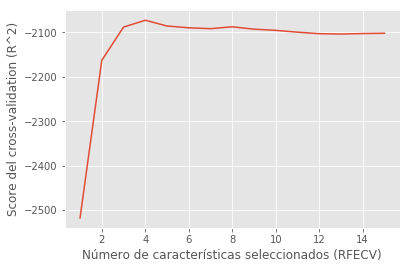

In [18]:
atrib_selec = seleccion(df_train1, 'FD001')
df_train1_kpi = df_train1[['unitNumber', 'cycle', 'opset_id'] +atrib_selec+ 
                           ['rul', 'rul_norm', 'label']]

df_test1_kpi = df_test1[['unitNumber', 'cycle', 'opset_id'] +atrib_selec+ 
                           ['RUL', 'label']]

In [19]:
df_train1_kpi.head()

,unitNumber,cycle,opset_id,sensorMeasure4,sensorMeasure9,sensorMeasure11,sensorMeasure12,rul,rul_norm,label
0,1.0,1.0,0,-0.978417,-0.869179,-0.292733,0.365199,191.0,0.005208,0
1,1.0,2.0,1,-0.688356,-0.965539,-0.216275,1.225379,190.0,0.010417,0
2,1.0,3.0,2,-0.567306,-0.562371,-1.057313,1.419613,189.0,0.015625,0
3,1.0,4.0,3,-0.833386,-0.719638,-1.038198,1.260064,188.0,0.020833,0
4,1.0,5.0,4,-0.336628,-0.461920,-1.019084,1.100514,187.0,0.026042,0


In [20]:
df_test1_kpi.head()

,unitNumber,cycle,opset_id,sensorMeasure4,sensorMeasure9,sensorMeasure11,sensorMeasure12,RUL,label
0,1.0,31.0,372.0,-0.871242,-0.175323,-0.950497,0.075254,112,0
1,2.0,49.0,50.0,0.912006,-1.192854,1.295920,-0.014081,98,0
2,3.0,126.0,831.0,2.117793,-0.800015,2.368073,-1.639976,69,0
3,4.0,106.0,268.0,0.321081,-0.621532,1.193810,0.236057,82,0
4,5.0,98.0,392.0,2.188106,-0.386178,0.223766,-1.336237,91,0


Luego de realizar la selección de características más importantes con los árboles de decisión, los indicadores clave de rendimiento (key performance index (KPI), por sus siglas en inglés) para el **archivo FD001** son los siguientes:

* **sensor 4: Temperatura total a la salida de la LPT (T50) (°R)**
* **sensor 9: Velocidad física del núcleo (Nc) rpm**
* **sensor 11: Presión estática en el HPC (Ps30) psia**
* **sensor 12: Relación de flujo de combustible a Ps30 (phi) pps/psi**

Quedando así, las siguientes características finales para el archivo **FD001:**

|Column|           Características           |                         Descripción                          | Unidades |
|-----:|:-----------------------------------:|:------------------------------------------------------------:|:--------:|
| 0    |        data_id                      | Nombre del archivo **(FD001/002/003/004)**                   | --       |
| 1    |        unitNumber                   | Número de la máquina                                         | --       |
| 2    |        cycle                        | Ciclos de la máquina                                         | --       |
| 3    |        opset_id                     | Configuración de operación                                   | --       |
| 4    |        sensor measurement  4        | Temperatura total a la salida de la LPT __(T50)__            | °R       | 
| 5    |        sensor measurement  9        | Velocidad física del núcleo __(Nc)__                         | rpm      |   
| 6    |        sensor measurement  11       | Presión estática en el HPC __(Ps30)__                        | psia     |
| 7    |        sensor measurement  12       | Relación de flujo de combustible a Ps30 __(phi)__            | pps/psi  | 
| 8    |        rul                          | Tiempo de vida útil remanente                                | --       |
| 9    |        rul_norm                     | Tiempo de vida útil remanente normalizado                    | --       |
| 10   |        label                        | Etiqueta de los datos                                        | --       |

Para el archivo FD003 se tiene que: 

Número óptimo de características: 13
Sensores seleccionados (KPI):['sensorMeasure4', 'sensorMeasure6', 'sensorMeasure7', 'sensorMeasure8', 'sensorMeasure9', 'sensorMeasure11', 'sensorMeasure12', 'sensorMeasure13', 'sensorMeasure14', 'sensorMeasure15', 'sensorMeasure17', 'sensorMeasure20', 'sensorMeasure21']


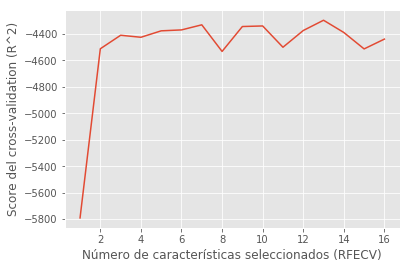

In [21]:
atrib_selec = seleccion(df_train3, 'FD003')
df_train3_kpi = df_train3[['unitNumber', 'cycle', 'opset_id'] +atrib_selec+ 
                           ['rul', 'rul_norm', 'label']]

df_test3_kpi = df_test3[['unitNumber', 'cycle', 'opset_id'] +atrib_selec+ 
                           ['RUL', 'label']]

In [22]:
df_train3_kpi.head()

,unitNumber,cycle,opset_id,sensorMeasure4,sensorMeasure6,sensorMeasure7,sensorMeasure8,sensorMeasure9,sensorMeasure11,sensorMeasure12,sensorMeasure13,sensorMeasure14,sensorMeasure15,sensorMeasure17,sensorMeasure20,sensorMeasure21,rul,rul_norm,label
0,1.0,1.0,147,-0.817614,0.7784,-0.341549,-0.735206,-0.103619,-0.409213,-0.227411,-0.419451,0.063121,0.470206,-0.935351,0.492284,-0.263997,258.0,0.003861,0
1,1.0,2.0,624,-0.812396,0.7784,-0.172693,-0.475924,0.099271,-0.646012,-0.193602,-0.288560,0.521547,0.729910,-0.348797,0.007932,0.377963,257.0,0.007722,0
2,1.0,3.0,208,0.097635,0.7784,-0.207629,-0.281462,0.302161,-0.679841,-0.313472,-0.124946,0.358389,-0.100481,-0.935351,-0.557146,-0.175172,256.0,0.011583,0
3,1.0,4.0,695,-0.317723,0.7784,-0.162504,-0.475924,0.017209,-0.612184,-0.172086,0.038668,0.138612,-0.138527,-0.348797,-0.113157,-0.658325,255.0,0.015444,0
4,1.0,5.0,505,-0.733081,0.7784,-0.117378,-0.216642,0.599699,-0.916640,-0.144424,-0.288560,0.214103,-0.153414,-0.348797,0.613372,0.439871,254.0,0.019305,0


In [23]:
df_test3_kpi.head()

,unitNumber,cycle,opset_id,sensorMeasure4,sensorMeasure6,sensorMeasure7,sensorMeasure8,sensorMeasure9,sensorMeasure11,sensorMeasure12,sensorMeasure13,sensorMeasure14,sensorMeasure15,sensorMeasure17,sensorMeasure20,sensorMeasure21,RUL,label
0,1.0,233.0,309.0,1.325965,-0.863395,2.681084,1.376820,2.459365,1.108375,2.644973,1.440491,2.064139,-2.419622,0.814411,2.548150,1.645978,44,0
1,2.0,124.0,65.0,1.299871,0.954321,-0.554407,1.095826,-0.460898,1.958583,-0.744353,1.023720,-1.055068,1.394056,0.055415,-0.983857,-1.149146,51,0
2,3.0,234.0,830.0,2.455250,0.348416,4.065156,2.009057,2.982864,1.816882,4.214017,2.135109,3.565378,-2.195433,2.332403,1.606282,2.390236,27,1
3,4.0,68.0,124.0,0.846127,0.954321,-0.815044,0.323093,-0.692625,-0.166937,-0.568961,0.468026,-0.472437,0.957996,0.055415,-1.749126,-0.187772,120,0
4,5.0,138.0,712.0,-0.502057,-0.863395,-0.334214,-0.449640,-0.467664,-0.969911,-0.346167,-0.434977,-0.601346,-0.118605,-1.462577,-0.630657,0.456730,101,0


Para el archivo FD002 se tiene que: 

Número óptimo de características: 6
Sensores seleccionados (KPI):['sensorMeasure4', 'sensorMeasure6', 'sensorMeasure11', 'sensorMeasure13', 'sensorMeasure14', 'sensorMeasure15']


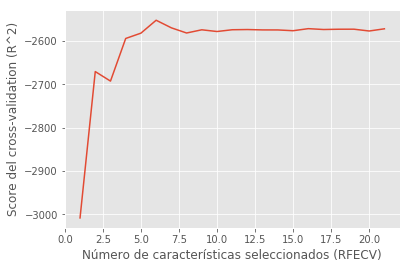

In [24]:
atrib_selec = seleccion(df_train2, 'FD002')

df_train2_kpi = df_train2[['unitNumber', 'cycle', 'opset_id'] +atrib_selec+ 
                           ['rul', 'rul_norm', 'label']]

df_test2_kpi = df_test2[['unitNumber', 'cycle', 'opset_id'] +atrib_selec+ 
                           ['RUL', 'label']]

In [25]:
df_train2_kpi.head()

,unitNumber,cycle,opset_id,sensorMeasure4,sensorMeasure6,sensorMeasure11,sensorMeasure13,sensorMeasure14,sensorMeasure15,rul,rul_norm,label
0,1.0,1.0,1423,-0.583859,-0.669937,-0.305175,0.408202,-0.236620,0.022739,148.0,0.006711,0
1,1.0,2.0,1424,-0.682747,-1.092353,-0.247764,0.407709,0.054488,0.066069,147.0,0.013423,0
2,1.0,3.0,1425,-1.359244,-0.481786,-2.005164,-2.551520,-2.489093,2.165707,146.0,0.020134,0
3,1.0,4.0,1426,-0.677565,-1.092353,-0.324311,0.407297,0.009853,0.032014,145.0,0.026846,0
4,1.0,5.0,1427,-1.355098,-0.479942,-1.941375,-2.551767,-2.533728,2.168753,144.0,0.033557,0


In [26]:
df_test2_kpi.head()

,unitNumber,cycle,opset_id,sensorMeasure4,sensorMeasure6,sensorMeasure11,sensorMeasure13,sensorMeasure14,sensorMeasure15,RUL,label
0,1.0,258.0,11452.0,1.024747,0.713939,0.923302,0.419304,1.233734,-0.761926,18,1
1,2.0,55.0,792.0,1.806852,1.835699,1.400457,0.417740,0.888502,-1.191033,79,0
2,3.0,165.0,5073.0,-0.567018,-0.663018,-0.309863,0.417349,0.090557,-0.007777,106,0
3,4.0,86.0,3152.0,0.457027,0.376125,0.486427,0.417740,-0.014897,-0.107430,110,0
4,5.0,148.0,1926.0,-0.527115,-1.081612,-0.148746,0.425090,0.922143,0.108595,15,1


Para el archivo FD004 se tiene que: 

Número óptimo de características: 4
Sensores seleccionados (KPI):['sensorMeasure6', 'sensorMeasure11', 'sensorMeasure13', 'sensorMeasure15']


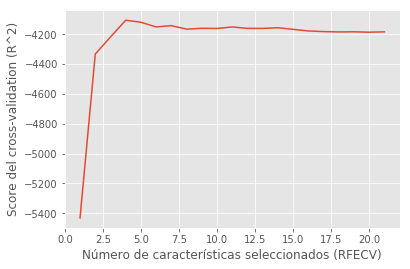

In [27]:
atrib_selec = seleccion(df_train4, 'FD004')

df_train4_kpi = df_train4[['unitNumber', 'cycle', 'opset_id'] +atrib_selec+ 
                           ['rul', 'rul_norm', 'label']]

df_test4_kpi = df_test4[['unitNumber', 'cycle', 'opset_id'] +atrib_selec+ 
                           ['RUL', 'label']]

In [28]:
df_train4_kpi.head()

,unitNumber,cycle,opset_id,sensorMeasure6,sensorMeasure11,sensorMeasure13,sensorMeasure15,rul,rul_norm,label
0,1.0,1.0,1523,-1.085435,-0.366811,0.402866,0.073273,320.0,0.003115,0
1,1.0,2.0,1430,0.381295,0.356811,0.402782,-0.126106,319.0,0.006231,0
2,1.0,3.0,2219,-1.087290,-0.376459,0.402698,-0.024033,318.0,0.009346,0
3,1.0,4.0,1815,-1.085435,-0.370027,0.403117,0.078040,317.0,0.012461,0
4,1.0,5.0,3632,-0.473525,-2.042398,0.402488,2.180772,316.0,0.015576,0


In [29]:
df_test4_kpi.head()

,unitNumber,cycle,opset_id,sensorMeasure6,sensorMeasure11,sensorMeasure13,sensorMeasure15,RUL,label
0,1.0,230.0,8249.0,-0.472212,-1.825952,-2.395465,1.984118,22,1
1,2.0,153.0,2617.0,-1.076586,-0.139309,0.414521,0.144877,39,0
2,3.0,141.0,8407.0,-1.082131,-0.285568,0.418120,0.017111,107,0
3,4.0,208.0,4676.0,-0.470364,-1.919309,-2.397264,2.089045,75,0
4,5.0,51.0,1488.0,-0.464819,-1.751267,-2.397733,2.182821,149,0


In [30]:
df_train1_kpi.to_csv('df_train1_kpi.csv')
df_train3_kpi.to_csv('df_train3_kpi.csv')
df_train2_kpi.to_csv('df_train2_kpi.csv')
df_train4_kpi.to_csv('df_train4_kpi.csv')

df_test1_kpi.to_csv('df_test1_kpi.csv')
df_test3_kpi.to_csv('df_test3_kpi.csv')
df_test2_kpi.to_csv('df_test2_kpi.csv')
df_test4_kpi.to_csv('df_test4_kpi.csv')